<p>Roll No.: 19D100011</p>
<p>ME 793 - Assignment 1</p>

### Which method of calculating inverse is used in Python?
In Python with Numpy, the <code>numpy.linalg.inv()</code> function is commonly used to calculate the inverse of a matrix. Numpy also uses various numerical algorithms.

In [266]:
import numpy as np
import timeit
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [267]:
lu_times = []
inv_times = []

n_values = [5, 10, 20, 50, 100]
for n in n_values:
    A = np.random.randint(1, 10, size=(n, n))   # creating the data
    
    df = pd.DataFrame(A)
    df.to_csv('%d.csv' %n, header=False, index=False)  # saving the data
    
    # Measure time for LU decomposition
    lu_time = timeit.timeit(lambda: scipy.linalg.lu(A), number=1) * 1e6  # convert to microseconds
    lu_times.append(round(lu_time,2))
    
    # Measure time for inverse calculation
    inv_time = timeit.timeit(lambda: np.linalg.inv(A), number=1) * 1e6  # convert to microseconds
    inv_times.append(round(inv_time,2))

In [268]:
df = pd.DataFrame(lu_times)
df.to_csv("lu_times_py.csv", header=False, index=False)
df = pd.DataFrame(inv_times)
df.to_csv("inv_times_py.csv", header=False, index=False)

In [271]:
with open('lu_times_py.csv') as f:
    lu_times_py = [float(line) for line in f]
with open('inv_times_py.csv') as f:
    inv_times_py = [float(line) for line in f]
with open('lu_times_mat.csv') as f:
    lu_times_mat = [float(line) for line in f]
with open('inv_times_mat.csv') as f:
    inv_times_mat = [float(line) for line in f]

### Time to compute LU Decomposition and Inverse in Python

In [272]:
print("LU Decomposition time (microsec):", lu_times_py)
print("Inverse Calculation time (microsec):", inv_times_py)

LU Decomposition time (microsec): [72.6, 45.2, 67.4, 106.2, 278.1]
Inverse Calculation time (microsec): [62.5, 118.5, 390.4, 155.6, 265.0]


### Time to compute LU Decomposition and Inverse in Matlab

In [273]:
print("LU Decomposition time (microsec):", lu_times_mat)
print("Inverse Calculation time (microsec):", inv_times_mat)

LU Decomposition time (microsec): [65.0, 36.0, 105.0, 111.0, 194.0]
Inverse Calculation time (microsec): [37.0, 25.0, 43.0, 65.0, 410.0]


### LU Decomposition Graph

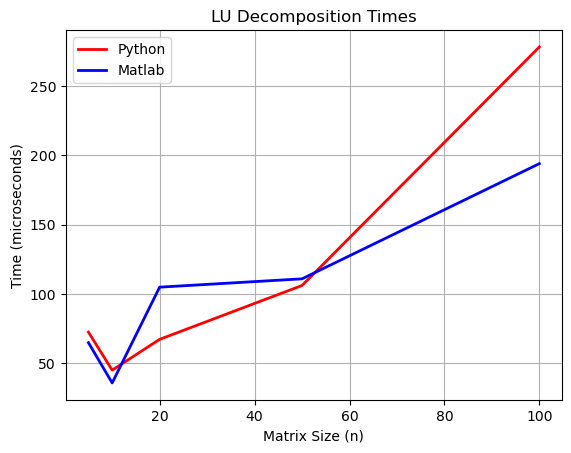

In [274]:
# Plotting
plt.figure()
plt.plot(n_values, lu_times_py, 'r-', linewidth=2, label='Python')
plt.plot(n_values, lu_times_mat, 'b-', linewidth=2, label='Matlab')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (microseconds)')
plt.title('LU Decomposition Times')
plt.legend()
plt.grid(True)
plt.show()

### Inverse Calculation Graph

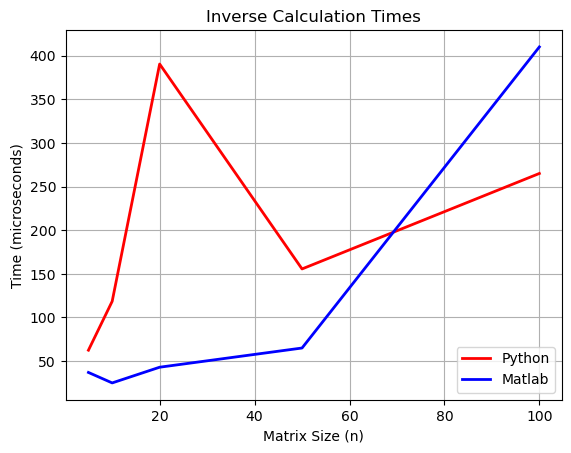

In [275]:
# Plotting
plt.figure()
plt.plot(n_values, inv_times_py, 'r-', linewidth=2, label='Python')
plt.plot(n_values, inv_times_mat, 'b-', linewidth=2, label='Matlab')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (microseconds)')
plt.title('Inverse Calculation Times')
plt.legend()
plt.grid(True)
plt.show()